In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Connect to SQLite database (will create sales_data.db if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# Step 2: Create sales table if it doesn't already exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
# Step 3: Insert sample data (only if table is empty)
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Product A", 20, 18.0),
        ("Product B", 10, 15.0),
        ("Product A", 3, 5.0),
        ("Product C", 7, 30.0),
        ("Product B", 11, 24.0),
        ("Product C", 9, 15.0),
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

In [5]:
# Step 4: Write SQL query to get total quantity and revenue per product
query = """
SELECT
product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [6]:
# Step 5: Execute query and load into pandas DataFrame
df = pd.read_sql_query(query, conn)


In [7]:
# Step 6: Print the results
print("Sales Summary:")
print(df)


Sales Summary:
     product  total_qty  revenue
0  Product A         23    375.0
1  Product B         21    414.0
2  Product C         16    345.0


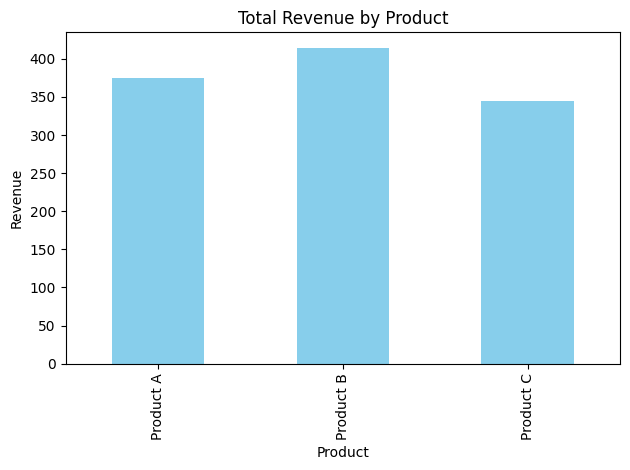

In [8]:
# Step 7: Plot bar chart of revenue by product
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

In [9]:
# Step 8: Save and show the chart
plt.savefig("sales_chart.png")
plt.show()


<Figure size 640x480 with 0 Axes>

In [10]:
# Step 9: Close the database connection
conn.close()